<a href="https://colab.research.google.com/github/deryabol/Image_Processing/blob/main/Naive_Bayes_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dataset=pd.read_csv('/content/Social_Network_Ads.csv')

In [3]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [6]:
x=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,4].values

In [7]:
#splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test =train_test_split(x,y,test_size=0.25, random_state=0)


In [8]:
# feature Scalling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [9]:
#Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [10]:
classifier

GaussianNB()

In [11]:
#Predicting the Test set results
y_pred =classifier.predict(x_test)

In [12]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [13]:
#check the Naive Bayes classifier using the Confusion matrix.
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [14]:
cm

array([[65,  3],
       [ 7, 25]])

As we can see in the above code confusion matrix output, there are 7+3=10 incorrect predictions, and 65+25=90 correct predictions

<ipython-input-40-bd116ecd4153>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set==j,0], x_set[y_set==j, 1],


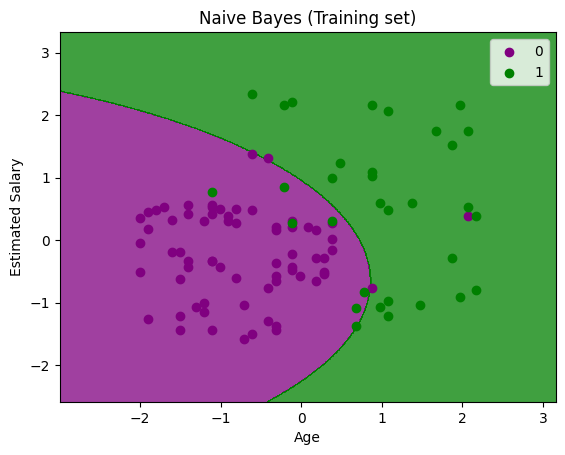

In [40]:
#visualizng the training set result

from matplotlib.colors import ListedColormap
x_set, y_set=x_test, y_test
X1, X2=np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1, step=0.01),
                   np.arange(start=x_set[:,1].min()-1, stop=x_set[:,1].max()+1, step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('purple','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set==j,0], x_set[y_set==j, 1],
              c=ListedColormap(('purple','green'))(i),label=j)

plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


The above output is final for test set data.As we can see the classifier has created a Gaussian curve to divide the "purchased" and "not purchased" variables.There ara some wrong predictions which we have calculated in Confusion matrix.But still it is pretty good classifier.